[*********************100%***********************]  1 of 1 completed

Loading data...


Start: 2023-05-03 00:00:00
End: 2024-09-25 00:00:00
Duration: 511 days 00:00:00
Exposure Time [%]: 100.0
Equity Initial [$]: 10000
Equity Final [$]: 7056.2
Equity Peak [$]: 10139.96
Return [%]: -29.44
Return (Ann.) [%]: -22.09
Volatility (Ann.) [%]: 12.23
Sharpe Ratio: -1.81
Sortino Ratio: -1.82
Max. Drawdown [%]: -30.57
Calmar Ratio: -0.72
Avg. Drawdown [%]: -16.39
Max. Drawdown Duration: 509 days 00:00:00
Avg. Drawdown Duration: 509 days 00:00:00
# Trades: 352
Best Day [%]: 2.91
Worst Day [%]: -2.31
Avg. Trade [%]: -0.1
Max. Trade Duration: 511
strategy: neural_network_regression


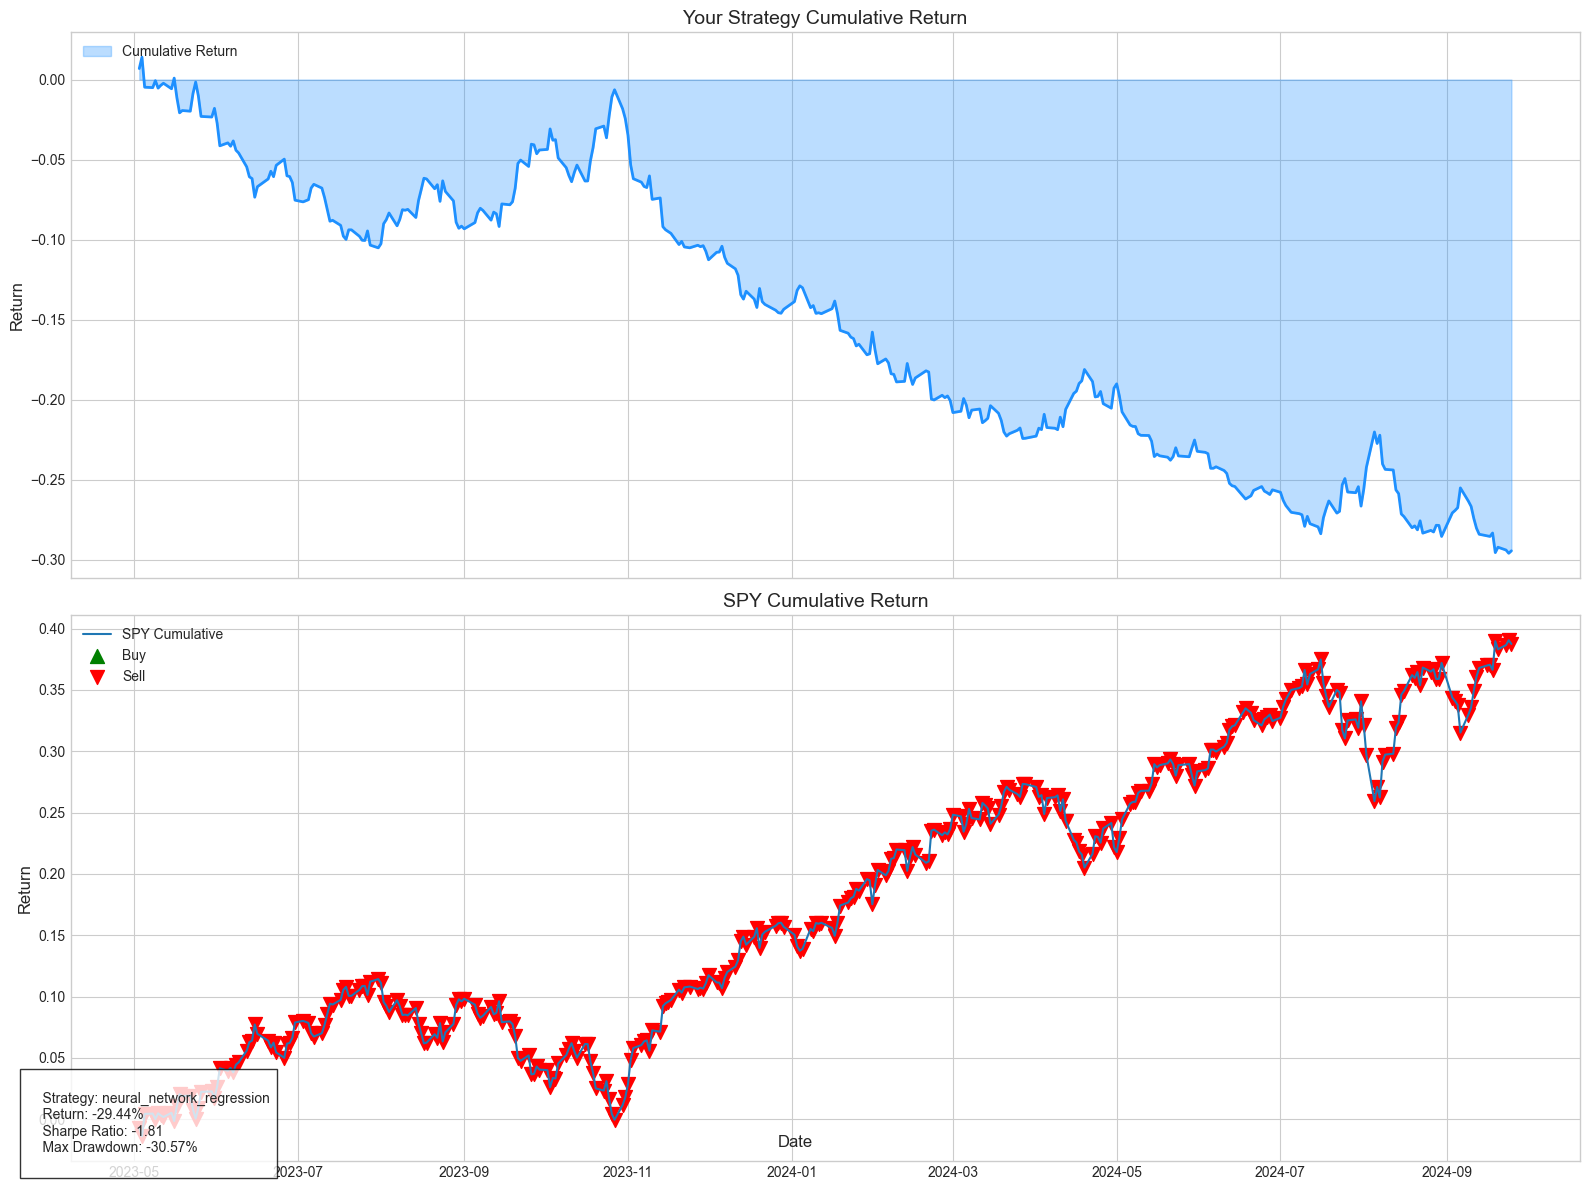

In [3]:
import tr4der

query = "I want to use neural network model to trade SPY for the past 3 years"

tr4der.Tr4der(query)


In [ ]:
dir(tr4der)